

### **1. Physical Modeling: The Kinematic Bicycle Model**

Instead of treating the car as a simple point moving on a screen, we used the **Kinematic Bicycle Model**. This is the industry standard for vehicle simulations because it accounts for the fact that a car's front and rear wheels follow different paths during a turn.

* **How it works:** We represent the car using its wheelbase (). We calculate a **Slip Angle ()**, which tells us the direction the car is actually moving versus where it is pointing.
* **The Constraints:** This model captures "non-holonomic" constraints—meaning the car cannot move sideways like a crab; it must have forward velocity to change its position.
* **Realism:** By using this, the agent learns that it can’t just turn 90 degrees instantly at high speeds, mimicking real-world driving physics.

---

### **2. State Representation: What the Agent "Sees"**

A common mistake in RL is giving the agent absolute coordinates (). This makes it hard for the agent to learn. Instead, we provide **Relative States**, which make the track look the same to the car regardless of where it is on the circle.

* **Lateral Deviation ():** This is the distance from the centerline. It’s like the car’s "lane-keep" sensor.
* **Heading Error ():** This tells the car how much its nose is pointed away from the perfect tangent of the curve.
* **Velocity ():** Speed is essential so the agent knows how much braking force is needed before a sharp turn.
* **Position Encoding ():** These trigonometric values give the car a "circular compass." Unlike a raw angle (which jumps from 359° to 0° and confuses the AI), these values change smoothly all the way around the track.

---

### **3. Reward Engineering: The Carrot and the Stick**

The reward function is the most critical part of the design. It defines the "personality" of the driver. We designed it using a "weighted sum" approach:

**The Formula:**
**Reward = (Progress Bonus) - (Off-Center Penalty) - (Alignment Penalty)**

* **The Progress Bonus ():** This is the "Carrot." We reward the car based on the change in its angular position. This ensures the goal is to finish the lap, not just drive fast in any direction.
* **The Centerline Penalty ():** This acts as the "Guardrail." If the car drifts toward the inner or outer walls, the reward drops. This teaches the car to stay in the middle of the lane.
* **The Alignment Penalty ():** This encourages "Smoothness." By penalizing the heading error, we discourage the car from zig-zagging or "drifting" sideways, leading to a much more stable racing line.
* **The Termination Penalty:** If the car hits a wall, it receives a massive negative score (e.g., -100). This is the ultimate "Stick" that teaches the agent that crashing is the worst possible outcome.



# Algorithm Selection & Comparative Analysis

After setting up the environment, the choice of Reinforcement Learning (RL) algorithm is critical. While multiple "heavy hitter" algorithms exist, Proximal Policy Optimization (PPO) is best we considered the "gold standard" for continuous control tasks like driving.

Below is an exhaustive breakdown of why I selected PPO was selected and why other popular algorithms often struggle with this specific scenario.

---

## **1. Why PPO was the Best Choice**

PPO is an On Policy algorithm. It is highly effective for driving models due to three main factors:

* Stability via Clipping: Driving requires precision. If an RL agent makes a massive update to its weights, the car might suddenly "teleport" its steering to , causing an immediate crash. PPO’s objective function clips these updates, ensuring the policy doesn't change too drastically in a single training step.
* Continuous Action Support: Unlike older algorithms designed for "Left/Right/Straight" buttons, PPO handles the continuous range of steering angles () naturally.
* Ease of Use: While off policy methods can be faster, PPO is far less "fiddly" to tune. It strikes an excellent balance between implementation complexity and reliable performance.

---

## **2. Why Other Models Fall Short**

### **Deep Q-Networks (DQN)**

* The Issue: DQN is built for Discrete Action Spaces (like Atari games).
* The "Driving" Fail: To use DQN, you must discretize steering (e.g., -90, -45, 0, 45, 90). This results in "choppy" driving. If the car needs a  adjustment to stay on track, but the model only knows , the car will oscillate wildly (zig-zag) and eventually fly off the track.

### **Deep Deterministic Policy Gradient (DDPG)**

* The Issue: DDPG is an Off-Policy learner that uses a "Replay Buffer."
* The "Driving" Fail: DDPG is notoriously unstable and prone to Q-value overestimation. In a circular track, the agent often finds a "cheat" in the reward function or gets stuck in a local optimum where it just spins in circles because the model became over-optimistic about a bad move.

### **Soft Actor-Critic (SAC)**

* The Issue: SAC is high-performance but mathematically complex.
* The "Driving" Fail: SAC is a strong candidate, but it is often over-engineered for a simple annular track. SAC prioritizes entropy (randomness) to explore the environment. On a track where the goal is consistent (follow the circle), SAC might spend too much time "exploring" the walls when PPO would have already converged on the centerline.


In [2]:
!pip install gymnasium
!pip install stable-baselines3[extra]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.0/188.0 kB 6.3 MB/s eta 0:00:00


Gym has been unmaintained since 2022 and does not support NumPy 2.0 amongst other critical functionality.
Please upgrade to Gymnasium, the maintained drop-in replacement of Gym, or contact the authors of your software and request that they upgrade.
See the migration guide at https://gymnasium.farama.org/introduction/migration_guide/ for additional information.


Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 192      |
|    ep_rew_mean     | -45.2    |
| time/              |          |
|    fps             | 1332     |
|    iterations      | 1        |
|    time_elapsed    | 1        |
|    total_timesteps | 2048     |
---------------------------------


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 212          |
|    ep_rew_mean          | -49.8        |
| time/                   |              |
|    fps                  | 871          |
|    iterations           | 2            |
|    time_elapsed         | 4            |
|    total_timesteps      | 4096         |
| train/                  |              |
|    approx_kl            | 0.0067651076 |
|    clip_fraction        | 0.0686       |
|    clip_range           | 0.2          |
|    entropy_loss         | -2.84        |
|    explained_variance   | 0.0868       |
|    learning_rate        | 0.0003       |
|    loss                 | 29.4         |
|    n_updates            | 10           |
|    policy_gradient_loss | -0.00707     |
|    std                  | 1            |
|    value_loss           | 104          |
------------------------------------------
-----------------------------------------
| rollout/  

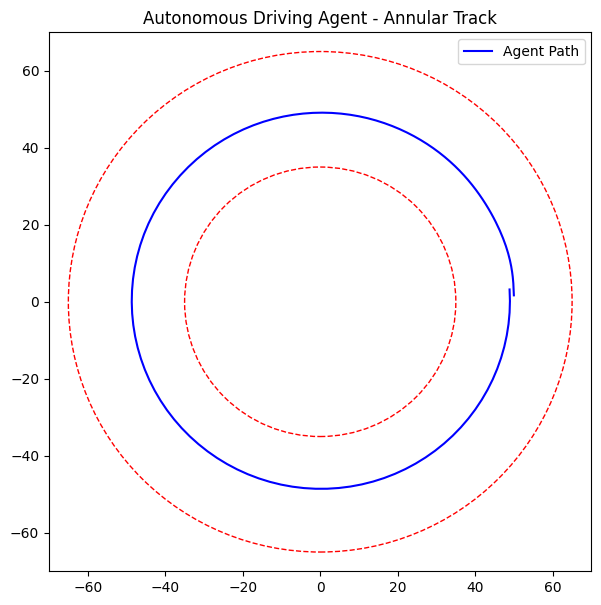

In [3]:
import gymnasium as gym
from gymnasium import spaces
import numpy as np
from stable_baselines3 import PPO
import matplotlib.pyplot as plt

class AutonomousDrivingEnv(gym.Env):
    def __init__(self):
        super(AutonomousDrivingEnv, self).__init__()

        # Action Space: [Acceleration (-1 to 1), Steering (-1 to 1)]
        self.action_space = spaces.Box(low=-1, high=1, shape=(2,), dtype=np.float32)

        # Obs Space: [dist_from_center, heading_error, velocity, sin(theta), cos(theta)]
        self.observation_space = spaces.Box(low=-np.inf, high=np.inf, shape=(5,), dtype=np.float32)

        # Track Constraints
        self.R_inner = 35.0
        self.R_outer = 65.0
        self.R_target = 50.0  #avg

        # Vehicle Constants
        self.wheelbase = 2.8
        self.dt = 0.1
        self.max_speed = 30.0
        self.max_accel = 4.0

    def reset(self, seed=None, options=None):
        super().reset(seed=seed)

        # Start at a random angle on the track for better generalization
        start_angle = self.np_random.uniform(0, 2 * np.pi)
        x = self.R_target * np.cos(start_angle)
        y = self.R_target * np.sin(start_angle)

        # Heading tangent to the circle
        phi = start_angle + np.pi/2

        self.state = np.array([x, y, phi, 0.0], dtype=np.float32) # [x, y, heading, vel]
        self.steps = 0
        self.total_progress = 0.0

        return self._get_obs(), {}

    def _get_obs(self):
        x, y, phi, v = self.state
        dist = np.sqrt(x**2 + y**2)

        # 1. Lateral deviation from centerline
        dist_error = dist - self.R_target

        # 2. Orientation error (angle vs tangent)
        track_angle = np.arctan2(y, x)
        target_heading = track_angle + np.pi/2
        heading_error = np.arctan2(np.sin(phi - target_heading), np.cos(phi - target_heading))

        return np.array([dist_error, heading_error, v, np.sin(track_angle), np.cos(track_angle)], dtype=np.float32)

    def step(self, action):
        accel = action[0] * self.max_accel
        steering = action[1] * (np.pi/4) # Max 45 degrees steering

        x, y, phi, v = self.state

        # Kinematic Bicycle Model
        beta = np.arctan(0.5 * np.tan(steering)) # Slip angle

        new_x = x + v * np.cos(phi + beta) * self.dt
        new_y = y + v * np.sin(phi + beta) * self.dt
        new_phi = phi + (v / self.wheelbase) * np.sin(beta) * self.dt
        new_v = np.clip(v + accel * self.dt, 0, self.max_speed)

        # Update State
        self.state = np.array([new_x, new_y, new_phi, new_v])

        # Calculate Progress
        old_angle = np.arctan2(y, x)
        new_angle = np.arctan2(new_y, new_x)
        angle_diff = np.arctan2(np.sin(new_angle - old_angle), np.cos(new_angle - old_angle))
        self.total_progress += angle_diff

        obs = self._get_obs()
        dist_err, head_err, vel, _, _ = obs


        # 1. Progress reward (angular velocity)
        reward = angle_diff * 50.0
        # 2. Stay in center penalty
        reward -= 0.1 * abs(dist_err)
        # 3. Heading alignment
        reward -= 0.05 * abs(head_err)
        # 4. Stay moving
        reward += 0.1 * vel

        # Termination
        curr_r = np.sqrt(new_x**2 + new_y**2)
        out_of_bounds = curr_r < self.R_inner or curr_r > self.R_outer
        lap_done = self.total_progress >= 2 * np.pi

        terminated = False
        if out_of_bounds:
            reward = -50.0
            terminated = True
        if lap_done:
            reward += 100.0
            terminated = True

        self.steps += 1
        if self.steps > 1000: # Timeout
            truncated = True
        else:
            truncated = False

        return obs, reward, terminated, truncated, {}

#Training and Visualizing

if __name__ == "__main__":
    env = AutonomousDrivingEnv()

    # Train PPO
    model = PPO("MlpPolicy", env, verbose=1, gamma=0.99)
    model.learn(total_timesteps=150000)

    # Test
    obs, _ = env.reset()
    path_x, path_y = [], []

    for _ in range(1000):
        action, _ = model.predict(obs, deterministic=True)
        obs, reward, done, trunc, _ = env.step(action)
        path_x.append(env.state[0])
        path_y.append(env.state[1])
        if done or trunc: break

    # Plot the results
    fig, ax = plt.subplots(figsize=(7,7))
    circ_inner = plt.Circle((0, 0), 35, color='r', fill=False, linestyle='--')
    circ_outer = plt.Circle((0, 0), 65, color='r', fill=False, linestyle='--')
    ax.add_patch(circ_inner)
    ax.add_patch(circ_outer)
    ax.plot(path_x, path_y, label='Agent Path', color='blue')
    ax.set_xlim(-70, 70); ax.set_ylim(-70, 70)
    plt.legend()
    plt.title("Autonomous driving agent annular track")
    plt.show()